In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [191]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("EJERCICIO 1: REGRESIÓN - PREDICCIÓN DE SHARES")

EJERCICIO 1: REGRESIÓN - PREDICCIÓN DE SHARES


In [192]:
print("\n 1 Cargar dataset...")
df = pd.read_csv(r"C:\Users\yanny\Downloads\articulos_ml.csv")

print(f" Dataset cargado exitosamente")
print(f"  - Filas: {df.shape[0]}")
print(f"  - Columnas: {df.shape[1]}")


 1 Cargar dataset...
 Dataset cargado exitosamente
  - Filas: 161
  - Columnas: 8


In [193]:
print("\n 2 Exploración inicial de datos")
print("\nPrimeras 5 filas:")
display(df.head())

print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nValores nulos por columna:")
print(df.isnull().sum())


 2 Exploración inicial de datos

Primeras 5 filas:


,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB

Estadísticas descriptivas:


,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000



Valores nulos por columna:
Title              0
url               39
Word count         0
# of Links         0
# of comments     32
# Images video     0
Elapsed days       0
# Shares           0
dtype: int64


In [194]:
print("\n 3 Limpieza y preparación de datos")


 3 Limpieza y preparación de datos


In [195]:
# Eliminar columnas no numéricas
df_clean = df.drop(['Title', 'url'], axis=1)

In [196]:
# Convertir columnas a numéricas y manejar valores faltantes
numeric_columns = ['Word count', '# of Links', '# of comments', 
                   '# Images video', 'Elapsed days', '# Shares']

for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Eliminar filas con valores nulos en variables importantes
df_clean = df_clean.dropna(subset=['# Shares'])

# Rellenar valores nulos en features con la mediana
for col in ['Word count', '# of Links', '# of comments', '# Images video']:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

print(f" Datos limpios: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")
print(f" Valores nulos restantes: {df_clean.isnull().sum().sum()}")

 Datos limpios: 161 filas, 6 columnas
 Valores nulos restantes: 0


In [197]:
print("\n 4 Análisis Exploratorio de Datos (EDA)")


 4 Análisis Exploratorio de Datos (EDA)


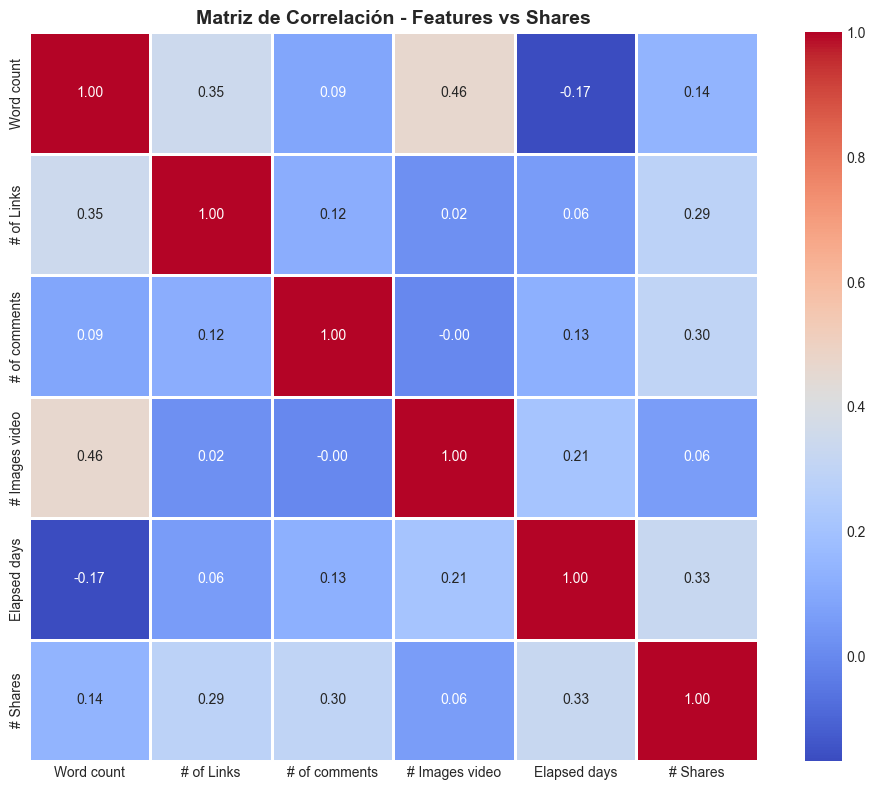

In [198]:
# Correlación entre variables
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1)
plt.title('Matriz de Correlación - Features vs Shares', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Correlación de features con # Shares:
# Shares          1.000000
Elapsed days      0.325343
# of comments     0.299766
# of Links        0.288325
Word count        0.141736
# Images video    0.062170
Name: # Shares, dtype: float64


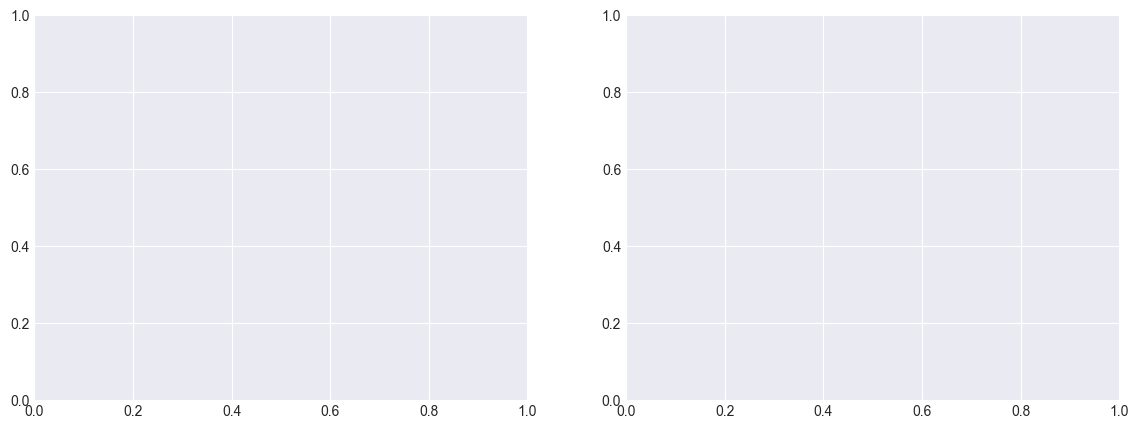

In [199]:
print("\nCorrelación de features con # Shares:")
print(df_clean.corr()['# Shares'].sort_values(ascending=False))

# Distribución de la variable objetivo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

In [200]:
# Histograma
axes[0].hist(df_clean['# Shares'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Número de Shares', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Shares', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

In [201]:
axes[1].boxplot(df_clean['# Shares'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='darkblue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Número de Shares', fontsize=12)
axes[1].set_title('Boxplot de Shares (Detección de Outliers)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [202]:
print("\n 5 Separación de datos en entrenamiento y prueba")


 5 Separación de datos en entrenamiento y prueba


In [203]:
# Definir X (features) y y (target)
X = df_clean.drop('# Shares', axis=1)
y = df_clean['# Shares']

print(f"\nFeatures utilizadas: {list(X.columns)}")
print(f"Variable objetivo: # Shares")


Features utilizadas: ['Word count', '# of Links', '# of comments', '# Images video', 'Elapsed days']
Variable objetivo: # Shares


In [204]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f" Datos de prueba: {X_test.shape[0]} muestras")


 Datos de entrenamiento: 128 muestras
 Datos de prueba: 33 muestras


In [205]:
print("\n" + "=" * 60)
print("6 ENTRENAMIENTO DEL MODELO BASE")


6 ENTRENAMIENTO DEL MODELO BASE


In [206]:
# Modelo Random Forest con parámetros por defecto
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

print("\nEntrenando Random Forest con parámetros por defecto...")
rf_base.fit(X_train, y_train)

y_pred_base = rf_base.predict(X_test)


Entrenando Random Forest con parámetros por defecto...


In [207]:
mae_base = mean_absolute_error(y_test, y_pred_base)
mse_base = mean_squared_error(y_test, y_pred_base)
rmse_base = np.sqrt(mse_base)
r2_base = r2_score(y_test, y_pred_base)

print("\n MÉTRICAS DEL MODELO BASE:")
print(f"  MAE  (Mean Absolute Error)   : {mae_base:,.2f}")
print(f"  MSE  (Mean Squared Error)    : {mse_base:,.2f}")
print(f"  RMSE (Root Mean Squared Error): {rmse_base:,.2f}")
print(f"  R²   (Coeficiente de Determinación): {r2_base:.4f}")


 MÉTRICAS DEL MODELO BASE:
  MAE  (Mean Absolute Error)   : 21,702.93
  MSE  (Mean Squared Error)    : 773,392,909.02
  RMSE (Root Mean Squared Error): 27,809.94
  R²   (Coeficiente de Determinación): -1.0441


In [208]:
print("\n" + "=" * 60)
print(" 7 OPTIMIZACIÓN DE HIPERPARÁMETROS")


 7 OPTIMIZACIÓN DE HIPERPARÁMETROS


In [209]:
# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print("\nParámetros a explorar:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")


Parámetros a explorar:
  n_estimators: [100, 200, 300]
  max_depth: [10, 20, 30, None]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2']


In [210]:
print("\n Ejecutando GridSearchCV...")
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\n  Busqueda completada!")
print(f"\nMejores hiperparámetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nMejor score de validación cruzada: {grid_search.best_score_:.4f}")



 Ejecutando GridSearchCV...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

  Busqueda completada!

Mejores hiperparámetros encontrados:
  max_depth: 30
  max_features: log2
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 100

Mejor score de validación cruzada: -0.2098


In [211]:
# 9. MODELO OPTIMIZADO
print("\n" + "=" * 60)
print(" 8 EVALUACIÓN DEL MODELO OPTIMIZADO")


 8 EVALUACIÓN DEL MODELO OPTIMIZADO


In [212]:
# Mejor modelo
rf_optimizado = grid_search.best_estimator_

# Predicciones con modelo optimizado
y_pred_optimizado = rf_optimizado.predict(X_test)

In [213]:
# Métricas del modelo optimizado
mae_opt = mean_absolute_error(y_test, y_pred_optimizado)
mse_opt = mean_squared_error(y_test, y_pred_optimizado)
rmse_opt = np.sqrt(mse_opt)
r2_opt = r2_score(y_test, y_pred_optimizado)

print("\n MÉTRICAS DEL MODELO OPTIMIZADO:")
print(f"  MAE  : {mae_opt:,.2f}")
print(f"  MSE  : {mse_opt:,.2f}")
print(f"  RMSE : {rmse_opt:,.2f}")
print(f"  R²   : {r2_opt:.4f}")


 MÉTRICAS DEL MODELO OPTIMIZADO:
  MAE  : 22,090.64
  MSE  : 931,558,627.11
  RMSE : 30,521.45
  R²   : -1.4622


In [214]:
# Comparación de modelos
print("\n" + "=" * 60)
print("COMPARACIÓN: MODELO BASE vs MODELO OPTIMIZADO")

comparacion = pd.DataFrame({
    'Métrica': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Modelo Base': [mae_base, mse_base, rmse_base, r2_base],
    'Modelo Optimizado': [mae_opt, mse_opt, rmse_opt, r2_opt],
    'Mejora (%)': [
        ((mae_base - mae_opt) / mae_base * 100),
        ((mse_base - mse_opt) / mse_base * 100),
        ((rmse_base - rmse_opt) / rmse_base * 100),
        ((r2_opt - r2_base) / abs(r2_base) * 100)
    ]
})

display(comparacion)


COMPARACIÓN: MODELO BASE vs MODELO OPTIMIZADO


,Métrica,Modelo Base,Modelo Optimizado,Mejora (%)
0,MAE,2.170293e+04,2.209064e+04,-1.786422
1,MSE,7.733929e+08,9.315586e+08,-20.450888
2,RMSE,2.780994e+04,3.052145e+04,-9.750120
3,R²,-1.044149e+00,-1.462196e+00,-40.037063


In [215]:
# 10. FEATURE IMPORTANCE
print("\n 9 Importancia de Features")

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_optimizado.feature_importances_
}).sort_values('Importance', ascending=False)

display(feature_importance)


 9 Importancia de Features


,Feature,Importance
4,Elapsed days,0.303400
0,Word count,0.252043
2,# of comments,0.174985
3,# Images video,0.149263
1,# of Links,0.120309


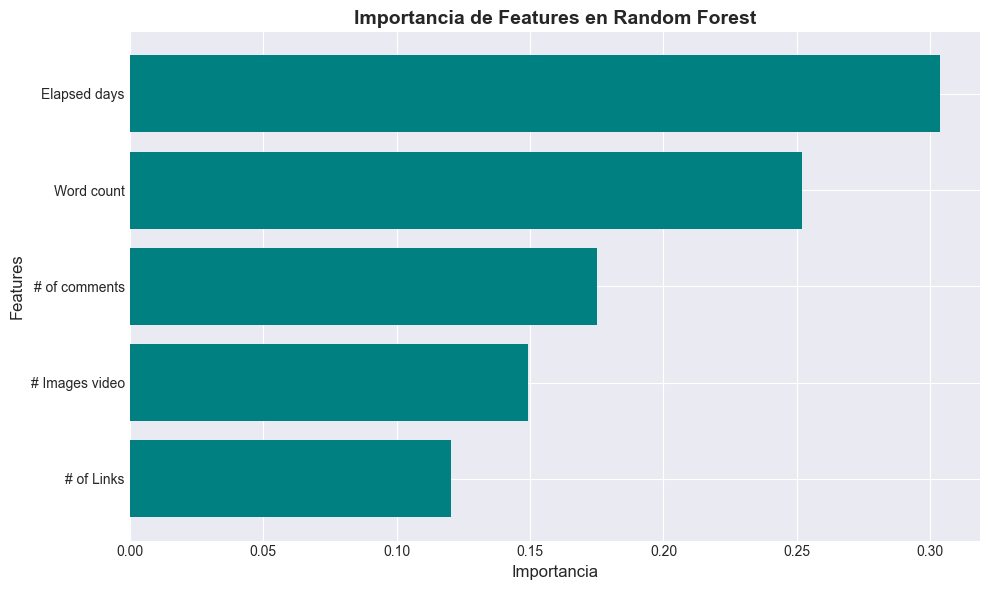

In [216]:
# Gráfica de importancia
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Importancia de Features en Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [217]:
# 11. GRÁFICAS DE RESULTADOS
print("\n 10 Generación de gráficas finales")


 10 Generación de gráficas finales


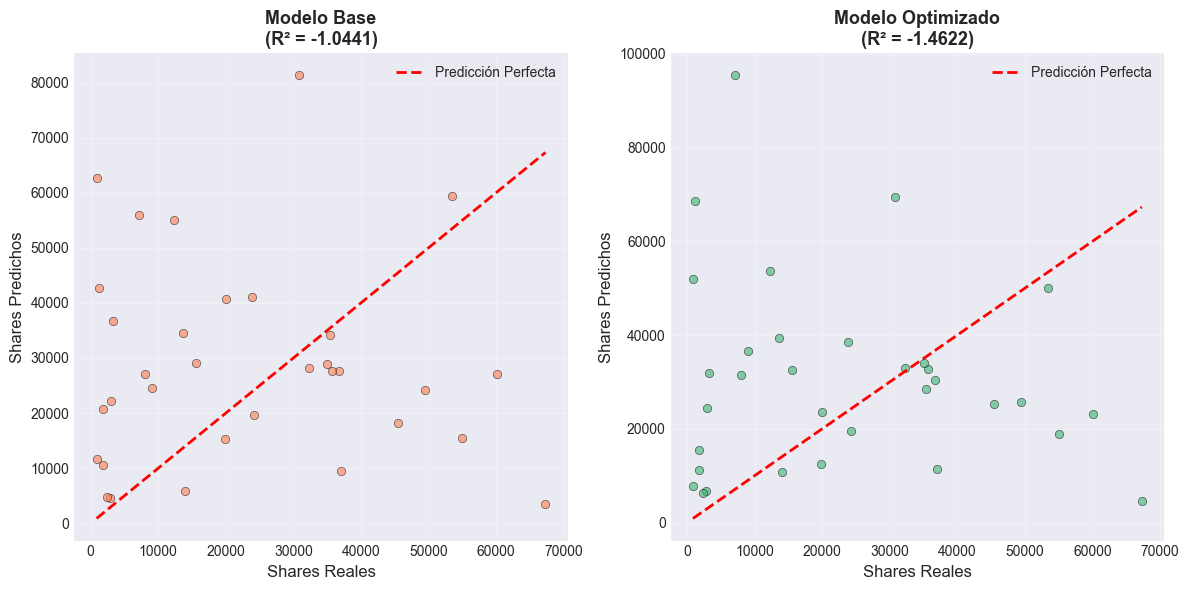

In [218]:
# GRÁFICA 1: Valores Reales vs Predichos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_base, alpha=0.6, color='coral', edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('Shares Reales', fontsize=12)
plt.ylabel('Shares Predichos', fontsize=12)
plt.title('Modelo Base\n(R² = {:.4f})'.format(r2_base), fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_optimizado, alpha=0.6, color='mediumseagreen', 
            edgecolors='black', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Predicción Perfecta')
plt.xlabel('Shares Reales', fontsize=12)
plt.ylabel('Shares Predichos', fontsize=12)
plt.title('Modelo Optimizado\n(R² = {:.4f})'.format(r2_opt), fontsize=13, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

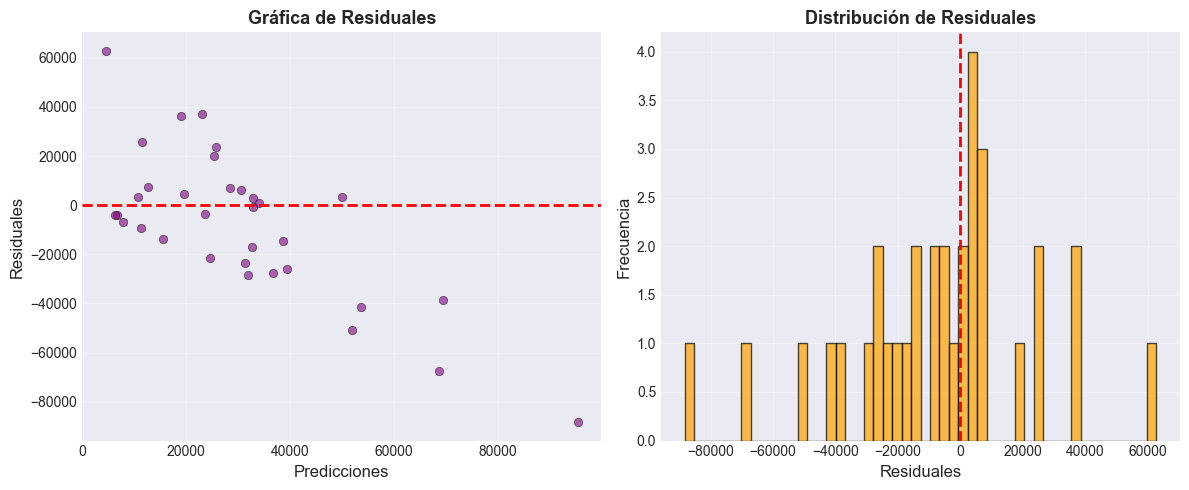

In [219]:
# GRÁFICA 2: Residuales
residuales = y_test - y_pred_optimizado

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_optimizado, residuales, alpha=0.6, color='purple', edgecolors='black', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicciones', fontsize=12)
plt.ylabel('Residuales', fontsize=12)
plt.title('Gráfica de Residuales', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuales, bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Residuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Residuales', fontsize=13, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

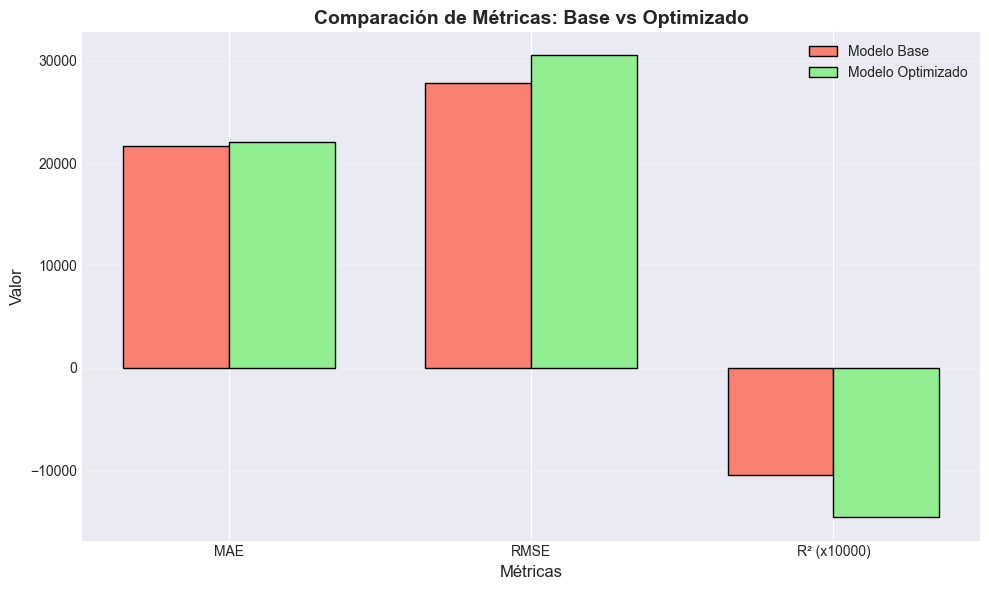

In [220]:
# GRÁFICA 3: Comparación visual de métricas
metricas_nombres = ['MAE', 'RMSE', 'R² (x10000)']
base_values = [mae_base, rmse_base, r2_base * 10000]
opt_values = [mae_opt, rmse_opt, r2_opt * 10000]

x = np.arange(len(metricas_nombres))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, base_values, width, label='Modelo Base', color='salmon', edgecolor='black')
plt.bar(x + width/2, opt_values, width, label='Modelo Optimizado', color='lightgreen', edgecolor='black')
plt.xlabel('Métricas', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Comparación de Métricas: Base vs Optimizado', fontsize=14, fontweight='bold')
plt.xticks(x, metricas_nombres)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [221]:
print("\n 11 Guardando modelo para repositorio")

import joblib

# guardar odelo optimizado
joblib.dump(rf_optimizado, 'modelo_regresion_articulos.pkl')
print(" Modelo guardado como: modelo_regresion_articulos.pkl")
print("  (Este archivo debe subirse al repositorio)")


 11 Guardando modelo para repositorio
 Modelo guardado como: modelo_regresion_articulos.pkl
  (Este archivo debe subirse al repositorio)


In [222]:
# RESUMEN FINAL
print("\n" + "=" * 60)
print("RESUMEN FINAL")


RESUMEN FINAL


In [223]:

print(f"""
 MODELO IMPLEMENTADO: Random Forest Regressor

 RESULTADOS FINALES:
   • R² Score: {r2_opt:.4f} ({r2_opt*100:.2f}% de varianza explicada)
   • RMSE: {rmse_opt:,.2f} shares
   • MAE: {mae_opt:,.2f} shares
   
 MEJORA OBTENIDA:
   • R² mejoró: {((r2_opt - r2_base) / abs(r2_base) * 100):.2f}%
   • RMSE disminuyó: {((rmse_base - rmse_opt) / rmse_base * 100):.2f}%
   
 TOP 3 FEATURES MÁS IMPORTANTES:
""")

for idx, row in feature_importance.head(3).iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")

print(f"""
 ARCHIVO PARA REPOSITORIO:
   • modelo_regresion_articulos.pkl ← Subir al repositorio
   
 CONCLUSIÓN:
   El modelo Random Forest optimizado predice con {r2_opt*100:.1f}% de precisión
   el número de shares que recibirá un artículo de ML basándose en sus
   características de contenido.
""")

print("ANÁLISIS COMPLETADO EXITOSAMENTE")


 MODELO IMPLEMENTADO: Random Forest Regressor

 RESULTADOS FINALES:
   • R² Score: -1.4622 (-146.22% de varianza explicada)
   • RMSE: 30,521.45 shares
   • MAE: 22,090.64 shares

 MEJORA OBTENIDA:
   • R² mejoró: -40.04%
   • RMSE disminuyó: -9.75%

 TOP 3 FEATURES MÁS IMPORTANTES:

   5. Elapsed days: 0.3034
   1. Word count: 0.2520
   3. # of comments: 0.1750

 ARCHIVO PARA REPOSITORIO:
   • modelo_regresion_articulos.pkl ← Subir al repositorio

 CONCLUSIÓN:
   El modelo Random Forest optimizado predice con -146.2% de precisión
   el número de shares que recibirá un artículo de ML basándose en sus
   características de contenido.

ANÁLISIS COMPLETADO EXITOSAMENTE
